In [2]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from credentials import *   
# API's setup:
def twitter_setup():
    """

    """

    auth = tweepy.OAuthHandler("efaLfD1FCQN1Osywaj6fjIV4R", "uYt7uuNhG7YYBJmivxzrsZPPOV1TCqizLLxnEwmYRnWV4W9zqa")
    auth.set_access_token("985156748687355904-FzoJLdbfuifMhhEP3U30FDaQmAdRoWD", "ASNpaQBzV705MW4f268EjlhLXSiarsMTU7b9QJEPy1XO5")


    api = tweepy.API(auth)
    return api

In [15]:
extractor = twitter_setup()
 ###Para resolver el problema de IOPub rate exceeded correr:jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000 en Anaconda Prompor

tweets = extractor.user_timeline(screen_name="MinSaludCol", count=600,)
print("Number of tweets extracted: {}.\n".format(len(tweets)))


print(tweets)

Number of tweets extracted: 200.

[Status(_api=<tweepy.api.API object at 0x0000022053F05400>, _json={'created_at': 'Wed May 16 23:55:21 +0000 2018', 'id': 996901953723564032, 'id_str': '996901953723564032', 'text': 'En la Academia Nacional de Medicina, el ministro @agaviriau participa en la ceremonia de posesión del doctor César… https://t.co/lhN2GgIdeB', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'agaviriau', 'name': 'Alejandro Gaviria', 'id': 175806207, 'id_str': '175806207', 'indices': [49, 59]}], 'urls': [{'url': 'https://t.co/lhN2GgIdeB', 'expanded_url': 'https://twitter.com/i/web/status/996901953723564032', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 996898659513053185, 'in_reply_to_status_id_str': '996898659513053185', 'in_reply_to_user_id': 371797057, 'in_reply_to_user_id_str'

In [5]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [16]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
data

In [7]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"En la Academia Nacional de Medicina, el minist...",139,996901953723564032,2018-05-16 23:55:21,Twitter for Android,3,1
1,El ministro @agaviriau exalta el apoyo de @SoC...,140,996898659513053185,2018-05-16 23:42:16,Twitter for Android,13,3
2,"La #LeyEstatutaria, #Mipres y la creación del ...",140,996897520734351362,2018-05-16 23:37:45,Twitter for Android,10,7
3,Internet nos acerca y nos facilita la vida si ...,139,996888259329437698,2018-05-16 23:00:56,Hootsuite,0,1
4,Regalías aliviarán deudas de la salud. https:/...,86,996883020484358144,2018-05-16 22:40:07,Hootsuite,2,2
5,#LogrosEnSalud Defensa de los derechos de la m...,121,996877987642519556,2018-05-16 22:20:08,Hootsuite,2,1
6,La vacunación es la mejor forma de prevenir en...,134,996867918515273729,2018-05-16 21:40:07,Hootsuite,6,2
7,Siete recomendaciones para pacientes con asma....,140,996857982058205185,2018-05-16 21:00:38,Hootsuite,6,3
8,"El sexting no es un juego, es una actividad qu...",140,996852833684262918,2018-05-16 20:40:10,Hootsuite,1,1
9,El #sarampión es una enfermedad causada por un...,140,996847810761953280,2018-05-16 20:20:13,Hootsuite,4,4


In [17]:
mean = np.mean(data['len'])

print("La longitud promedio de los caracteres de los tweets del ministerio de Salud es: {}".format(mean))

La longitud promedio de los caracteres de los tweets del ministerio de Salud es: 130.52


In [18]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("El tweet con más likes es: \n{}".format(data['Tweets'][fav]))
print("El número de likes es: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("El tweets con más retweets es: \n{}".format(data['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

El tweet con más likes es: 
Por su compromiso social y aporte al cuidado de la salud, @MinSaludCol reconoce la labor de los 61.954 profesionale… https://t.co/xRLOF8XUq8
El número de likes es: 88
140 characters.

El tweets con más retweets es: 
RT @DapardAntioquia: #URGENTE | El @DapardAntioquia informa a la comunidad. https://t.co/NepBJ1tyGX
Número de retweets: 787
99 characters.



In [12]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

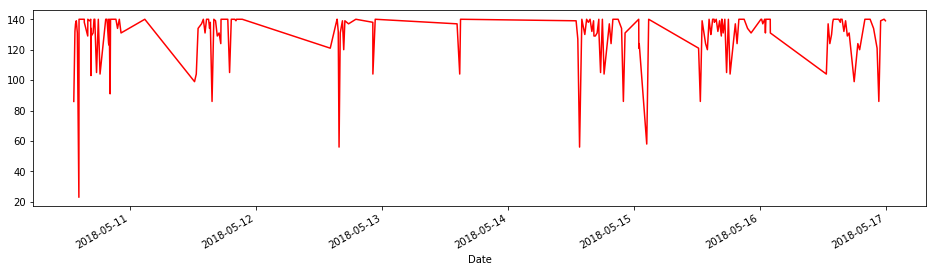

In [13]:
tlen.plot(figsize=(16,4), color='r');

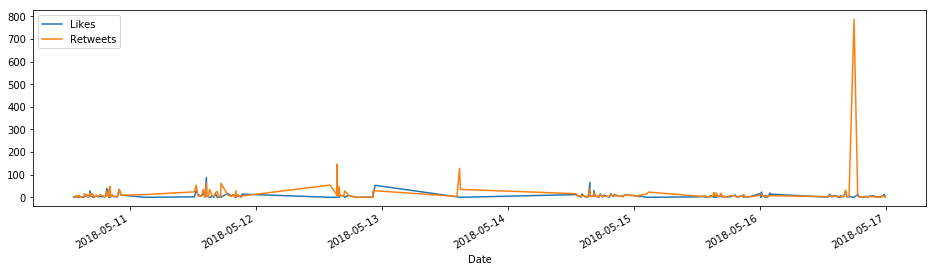

In [14]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [19]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Hootsuite
* Twitter Web Client
* Media Studio


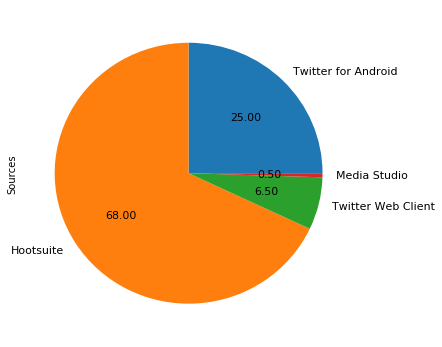

In [20]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [22]:
from textblob import TextBlob
import re

In [23]:
def clean_tweet(tweet):
   
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"En la Academia Nacional de Medicina, el minist...",139,996901953723564032,2018-05-16 23:55:21,Twitter for Android,3,1,0
1,El ministro @agaviriau exalta el apoyo de @SoC...,140,996898659513053185,2018-05-16 23:42:16,Twitter for Android,13,3,0
2,"La #LeyEstatutaria, #Mipres y la creación del ...",140,996897520734351362,2018-05-16 23:37:45,Twitter for Android,10,7,0
3,Internet nos acerca y nos facilita la vida si ...,139,996888259329437698,2018-05-16 23:00:56,Hootsuite,0,1,0
4,Regalías aliviarán deudas de la salud. https:/...,86,996883020484358144,2018-05-16 22:40:07,Hootsuite,2,2,0
5,#LogrosEnSalud Defensa de los derechos de la m...,121,996877987642519556,2018-05-16 22:20:08,Hootsuite,2,1,0
6,La vacunación es la mejor forma de prevenir en...,134,996867918515273729,2018-05-16 21:40:07,Hootsuite,6,2,0
7,Siete recomendaciones para pacientes con asma....,140,996857982058205185,2018-05-16 21:00:38,Hootsuite,6,3,0
8,"El sexting no es un juego, es una actividad qu...",140,996852833684262918,2018-05-16 20:40:10,Hootsuite,1,1,1
9,El #sarampión es una enfermedad causada por un...,140,996847810761953280,2018-05-16 20:20:13,Hootsuite,4,4,0


In [25]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [27]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 5.0%
Percentage of neutral tweets: 94.5%
Percentage de negative tweets: 0.5%
